In [18]:
%matplotlib notebook

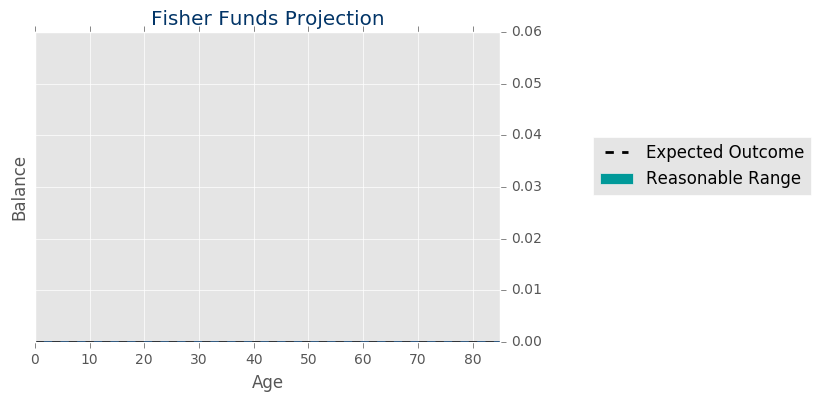

<function __main__.Projection>

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from operator import itemgetter
plt.style.use('ggplot')

def Projection(Balance,Age,PIR,Salary,Strategy,ret_inc,ret_str):
    Balance = int(Balance)
    ret_age = 65
    ages = [n for n in range(Age,86)]
    overall = []
    for i in range(1000):
        balances = [Balance]
        starting_sal = int(Salary)
        for i in range(Age,65):
            if balances[-1] > 0:
                ret = np.random.normal(Strategy[0],Strategy[1])
                balances.append((balances[-1]*(1+(ret*(1-PIR)/100))) + starting_sal * 0.03)
                starting_sal = starting_sal * 1.02
            else:
                balances.append(0)
        for i in range(65,85):
            if balances[-1] > 0:
                ret = np.random.normal(ret_str[0],ret_str[1])
                balances.append((balances[-1] - ret_inc) * (1+(ret*(1-PIR)/100)))
            else:
                balances.append(0)
        overall.append(balances)
    #print(starting_sal)
    lowest = []
    highest = []
    middle = []
    for i in range(len(ages)):
        sorted_list = sorted(overall, key = lambda x: x[i])
        lowest.append(sorted_list[400][i])
        highest.append(sorted_list[600][i])
        middle.append(sorted_list[500][i])
#     print(len(sorted_list))
#     print("Your expected value at the age of retirment ("+str(ret_age)+") is $" +str(int(middle[-1])))
#     print(len(ages)+1)
    fig, ax = plt.subplots(1)
    ax.plot(ages, lowest, color = '#003366', lw = 2.0)
    ax.plot(ages, highest, color = '#003366', lw = 2.0)
    ax.plot(ages, middle, label = 'Expected Outcome', color = '#000000', ls = 'dashed', lw = 2.0)
    ax.fill_between(ages, lowest, highest, alpha = 1.0, label = "Reasonable Range", facecolor = "#009999")
    plt.legend(bbox_to_anchor=(1.2, 0.66), loc=2, borderaxespad=0.)
    ax.set_xlabel("Age")
    ax.set_ylabel("Balance")
    ax.yaxis.tick_right()
    plt.title("Fisher Funds Projection", color = "#003366")
    plt.xlim(Age,85)
    plt.ylim(0,)
    plt.show()
    
  
interact(Projection, Strategy= widgets.Dropdown(options={'Conservative': (2,2),'Balanced':(5,5),'Growth':(7,12)},value=(7,12)), 
         Age = widgets.IntSlider(min=0,max=64,step=1,value=0,continuous_update=False, slider_color = "#003366", width = "70%"),
        Balance = widgets.Text("0", description = "Balance"),
        ret_inc = widgets.IntSlider(min=0,max=250000,step=1000,value=0,continuous_update=False,description = 'Retirement Income',
                                    slider_color = "#003366", width = "70%"),
        ret_str = widgets.Dropdown(options={'Conservative': (2,2),'Balanced':(5,5),'Growth':(7,12)},description='Retirement Strategy',value=(2,2)),
        PIR = widgets.Dropdown(options={'Low (10.5%)': (.105),'Mid (17.5%)':(0.175),'High (28%)':(0.28),'No Tax (0%)':(0)},description='PIR',value=(0))
        ,Salary = widgets.Text("0", description = "Salary", continuous_update=False))

